<a href="https://colab.research.google.com/github/Saadahm/Saadahm1/blob/main/Elastic_Net_Regression_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('AAPL.csv')

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02
mean,41.315260,42.562649,40.316071,41.523985,39.786268,1.152484e+09
std,30.491574,31.566297,29.586475,30.637048,31.238937,8.610701e+08
min,11.334286,11.898214,11.089286,11.437857,9.835445,5.352237e+07
25%,21.215179,21.773750,20.626428,21.225535,18.465643,5.476226e+08
50%,29.584999,30.000000,28.897499,29.757500,27.500698,8.290760e+08
75%,47.857501,48.385000,46.983750,47.797500,46.407387,1.474039e+09
max,143.070007,145.089996,133.690002,139.070007,138.627029,4.896550e+09


In [7]:
df['Date']=pd.to_datetime(df.Date)

In [9]:
df.shape

(523, 7)

In [10]:
df.drop('Adj Close',axis=1,inplace = True)

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2011-06-13,11.685714,11.901786,11.368929,11.437857,2188849600
1,2011-06-20,11.334286,11.898214,11.089286,11.655357,2524177600
2,2011-06-27,11.699643,12.267857,11.687500,12.259286,1744926400
3,2011-07-04,12.250000,12.857143,12.232143,12.846786,1688976800
4,2011-07-11,12.726429,13.035714,12.450714,13.032857,2200923200


In [12]:
x=df[['Open','High','Low','Volume']]
y=df['Close']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [14]:
x_train.shape

(392, 4)

In [15]:
x_test.shape

(131, 4)

In [16]:
from sklearn.linear_model import ElasticNet

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=ElasticNet(alpha=1.0, l1_ratio=0.5)


In [18]:
regressor.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
print(regressor.coef_)

[-0.00000000e+00  5.52744113e-01  4.45877005e-01 -1.35971970e-10]


In [20]:
print(regressor.intercept_)

0.1961851776024659


In [21]:
predicted=regressor.predict(x_test)

In [ ]:
print(x_test)

          Open       High        Low      Volume
15   14.280714  14.616071  13.613571  3073739200
78   18.750000  19.627144  18.056429  3344812800
137  19.645357  19.814285  17.626785  3266510800
264  23.847500  24.222500  23.592501   450824000
113  16.316429  18.008928  16.308214  2855347600
..         ...        ...        ...         ...
71   21.872143  22.692142  21.107143  3487162000
473  92.500000  96.317497  92.467499   564072000
6    13.941071  14.446429  13.714286  2952331200
8    12.917500  13.558571  12.607857  4376019200
319  37.645000  38.497501  36.825001   423272400

[131 rows x 4 columns]


In [22]:
predicted.shape

(131,)

In [26]:
dframe=pd.DataFrame(y_test,predicted)


In [25]:
dfr=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})

In [27]:
print(dfr)

     Actual Price  Predicted Price
15      13.618571        13.927168
78      18.206785        18.641119
137     17.878571        18.563639
264     24.170000        24.043084
113     17.940357        17.033724
..            ...              ...
71      21.571428        21.676166
473     95.919998        94.587548
6       13.945714        13.894814
8       13.463929        12.717143
319     37.375000        37.837320

[131 rows x 2 columns]


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [29]:
regressor.score(x_test,y_test)

0.9986161932875783

In [30]:
import math

In [31]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.6886115537504625


In [32]:
print('Mean Square Error:',metrics.mean_squared_error(y_test,predicted))

Mean Square Error: 1.2659179666744713


In [33]:
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

Root Mean Absolute Error: 0.8298262190064029


In [34]:
graph=dfr.head(30)

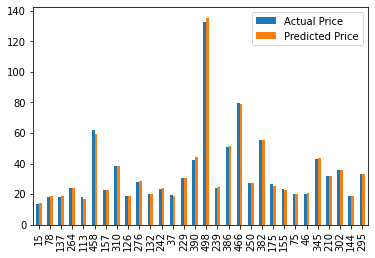

In [35]:
graph.plot(kind='bar')